In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
class MulticlassLogisticRegression:

    def hyp(self, features, weights):
        return sigmoid(features @ weights).reshape(features.shape[0], 1)

    def decision_boundary(self, prob):
        return (prob >= 0.5) * 1

    def score_function(self, features, labels, weights):
        pred = self.decision_boundary(self.hyp(features,  weights))
        return np.count_nonzero(pred == labels) / labels.shape[0]

    def cost_function(self, features, labels, weights):
        m, n = features.shape
        h = self.hyp(features, weights)
        cost = - labels * np.log(h + 0.00000001) - (1 - labels) * np.log(1 - h + 0.00000001) # to avoid log(0)

        lmd = 0.001
        plus = np.zeros(weights.shape)
        plus += lmd * np.sum(weights * weights)
        plus[0] = 0
        sum_plus = np.sum(plus)

        return cost.sum() / m + sum_plus / m

    def update_weights(self, features, labels, weights, lr):
        m, n = features.shape

        h = self.hyp(features, weights)
        loss = h - labels
        gradient = (features.T @ loss) / m

        lmd = 0.001
        plus = np.zeros(weights.shape)
        plus += 2 * lmd * np.sum(weights) / m
        plus[0] = 0

        gradient = gradient + plus
        return weights - lr * gradient

    def fit(self, features, labels):
        m, n = features.shape
        lr = 0.1
        cnt_it = 1000000
        dlr = (lr - 0.0003) / cnt_it
        story = []
        weights = np.random.rand(n).reshape(n, 1) * 10

        for it in range(cnt_it):
            weights = self.update_weights(features, labels, weights, lr)
            lr -= dlr
            if it % 10000 == 0:
                story.append(self.cost_function(features, labels, weights))

        self.weights, self.story = weights, story

    def calculate_cost_score(self, features, labels):
        self.cost = self.cost_function(features, labels, self.weights)
        self.score = self.score_function(features, labels, self.weights)
    
    def predict(self, features):
        return self.decision_boundary(self.hyp(features, self.weights))

    def get_info(self):
        return [self.weights, self.score, self.story, self.cost]

In [ ]:
def data_split(df, test_size):
    df = df.sample(frac=1).reset_index(drop=True)
    features, labels = df.iloc[ : , : -1 ], df.iloc[ : , [-1] ]
    features.insert(2, "x1x2", features['exam1'] * features['exam2'], True)
    # x = (x - x.mean()) / x.std()
    # y = (y - y.mean()) / y.std()

    features, labels = features.to_numpy(), labels.to_numpy()
    
    features = np.c_[np.ones(features.shape[0]), features]

    features_train, features_test = features[ : -test_size , : ], features[ -test_size : , : ]
    labels_train, labels_test = labels[ : -test_size , : ], labels[ -test_size : , : ]
    
    return [features_train, features_test, labels_train, labels_test]

In [ ]:
def MulticlassLogisticRegressionModel(df):
    MyMulticlassLogisticRegression = MulticlassLogisticRegression()

    features_train, features_test, labels_train, labels_test = data_split(df, 40)

    MyMulticlassLogisticRegression.fit(features_train, labels_train)
    MyMulticlassLogisticRegression.calculate_cost_score(features_test, labels_test)

    labels_pred = MyMulticlassLogisticRegression.predict(features_test)

    info = MyMulticlassLogisticRegression.get_info()

    return info

        exam1      exam2  admited?
0   34.623660  78.024693       0.0
1   30.286711  43.894998       0.0
2   35.847409  72.902198       0.0
3   60.182599  86.308552       1.0
4   79.032736  75.344376       1.0
..        ...        ...       ...
95  83.489163  48.380286       1.0
96  42.261701  87.103851       1.0
97  99.315009  68.775409       1.0
98  55.340018  64.931938       1.0
99  74.775893  89.529813       1.0

[100 rows x 3 columns]


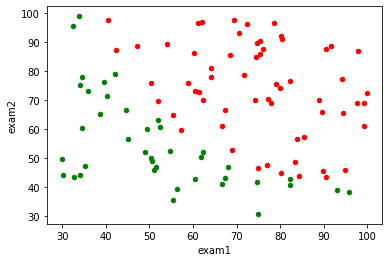

In [ ]:
df = pd.read_csv('HW_Week3-LogisticRegression_data.csv', index_col = [0])
print(df)
df1 = df[df['admited?'] == 0]
df2 = df[df['admited?'] == 1]
ax = df1.plot.scatter(x = 'exam1', y = 'exam2', c = 'g')
df2.plot.scatter(x = 'exam1', y = 'exam2', c = 'r', ax = ax)
plt.show()

In [ ]:
weights, score, story, cost = MulticlassLogisticRegressionModel(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
print(weights)

[[ -808.62495329]
 [-3025.70247079]
 [-2921.65237483]
 [  104.24328109]]


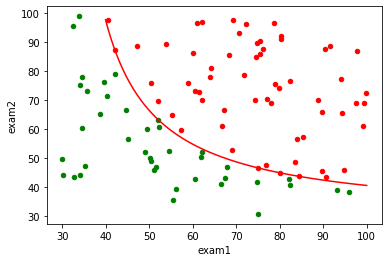

In [ ]:
ax = df1.plot.scatter(x = 'exam1', y = 'exam2', c = 'g')
df2.plot.scatter(x = 'exam1', y = 'exam2', c = 'r', ax = ax)

x = np.linspace(40, 100, 100)
y = (- weights[0] - weights[1] * x) / (weights[2] + weights[3] * x)
plt.plot(x, y, '-r', label='y=2x+1')

plt.show()

[12.10346756576194, 1271.7865411155296, 2973.5675734857873, 3560.421172026164, 4030.781783869403, 4654.974356762308, 5306.094774114669, 5740.531284724593, 6157.192808266189, 6547.667839898436, 6759.590667315759, 6896.529688148752, 6827.502369072011, 6680.3983870899265, 6530.757932796464, 6384.136972678329, 6239.22032125759, 6093.366717954716, 5947.54191509249, 5809.046267445661, 5680.673757176623, 5555.3402090845075, 5436.543593674713, 5314.732021374998, 5189.896387060094, 5054.144204886725, 4924.147141662541, 4800.932009031643, 4686.422889669828, 4572.831173858165, 4472.718635976689, 4366.00858926728, 4260.678220183561, 4164.418513283026, 4082.7171402544486, 3997.9494758895476, 3916.8796942443223, 3835.0037823814464, 3758.23019722306, 3687.7472976691315, 3604.886909230126, 3527.16937825692, 3455.376247478364, 3396.420926998724, 3330.9198203637534, 3269.6327391868695, 3207.288090608426, 3139.367135664323, 3077.8950497140377, 3014.4570256985094, 2940.627877340423, 2899.1053676785095, 28

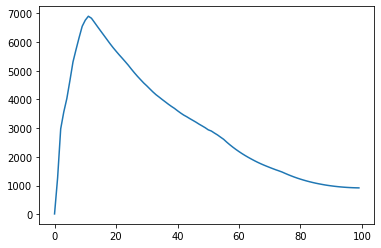

In [ ]:
x = np.arange(len(story))
print(story)
plt.plot(x, story)
plt.show()

In [ ]:
print(score)

0.975


In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression

features, labels = df.iloc[ : , : -1 ], df.iloc[ : , [-1] ]

labels = labels.values.ravel()

features.insert(0, "t0", np.ones(features.shape[0]), True)
features_train,features_test,labels_train,labels_test = train_test_split(features, labels, test_size = 0.4)

clf = LogisticRegression(random_state=0).fit(features_train, labels_train)
clf.predict(features_test)

clf.predict_proba(features_test)

clf.score(features_test, labels_test)

0.875